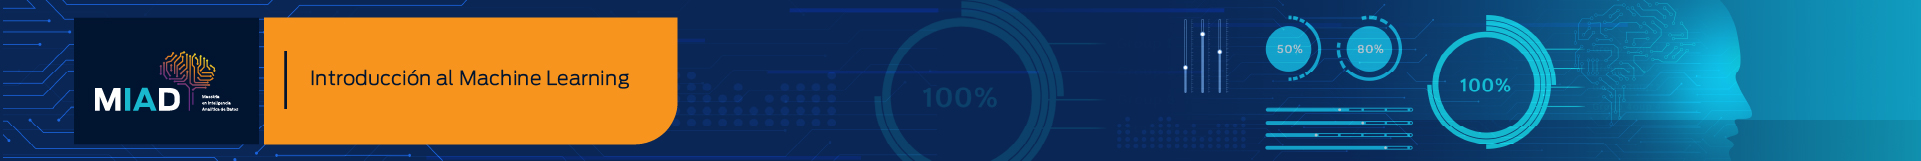

# Introducción al Machine Learning - Semana 2
## Caso: Modelos lineales para regresión, muestreo y selección del mejor modelo

### Propósito de la actividad

En esta actividad podrán poner en práctica, con un conjunto de datos reales, su habilidad para implementar modelos lineales y seleccionar aquel que tenga el mejor desempeño para resolver un problema de regresión. En particular, se deberán implementar modelos lineales de componentes principales, partial least squares y regularización.

Además, como en todo procedimiento de analítica de datos, se evaluará la exploración preliminar de los datos por medio de herramientas como histogramas, correlogramas y estadísticas descriptivas.

### Instrucciones generales

1. Para desarrollar el notebook, lo deberán descargar a un repositorio (pueden escoger el repositorio de su preferencia) para que lo puedan trabajar grupalmente.

2. Los procedimientos en el notebook deberán responderse en los espacios especificados para tal fin, debajo de cada uno de los puntos.

3. Para que la actividad sea calificada, deberán subir únicamente este mismo archivo con la extensión ".ipynb" a la actividad de "entrega calificada por el personal" correspondiente a este caso.

4. El archivo que suban debe poder ejecutarse localmente cuando sea descargado por el tutor, asumiendo que la base de datos de la actividad ya ha sido importada en el correspondiente archivo separado por comas (.csv).

### Criterios de evaluación

Los criterios que se evaluarán son:   

Análisis preliminar de variables: Se presentan correlogramas, histogramas y estadísticas descriptivas de las variables de la base de datos y se hace un análisis coherente de cada uno de ellos. [10 puntos] 

Estimación del modelo usando componentes principales: Se estima el modelo usando componentes principales, se evalúa su desempeño en la muestra de test y se analizan correctamente los resultados y el procedimiento realizado. [20 puntos] 

Estimación del modelo usando PCA y el método forward: Se estima el modelo usando el método forward con componentes principales, se responde si es el mismo modelo del punto 2, se evalúa su desempeño en la muestra de test y se analizan correctamente los resultados y el procedimiento realizado. [30 puntos] 

Estimación del modelo de partial least squares: Se estima el modelo usando partial least squares, se evalúa en la muestra de test y se analizan correctamente los resultados y el procedimiento realizado. [20 puntos] 

Estimación de un modelo de penalización: Se estima algún modelo de penalización, se evalúa en la muestra de test y se analizan correctamente los resultados y el procedimiento realizado. [15 puntos] 

Elección del mejor modelo: Se elige el mejor modelo de acuerdo a los resultados obtenidos y se justifica adecuadamente la elección. [5 puntos] 


### Datos

Existe gran variedad de bases de datos reales disponibles en internet usadas por la comunidad académica para la evaluación de modelos predictivos.

En esta ocasión usarán una base de datos disponible en la página R-Data. Esta base de datos corresponde a "Hitters", la cual contiene 20 variables de jugadores de la Major League Baseball en las temporadas de 1986 y 1987. De esta manera, el objetivo de la actividad es predecir el salario de un jugador basado en las características que describen las variables predictivas.

Por lo anterior, en primer lugar deberán descargar la base de datos del siguiente enlace: https://r-data.pmagunia.com/dataset/r-dataset-package-islr-hitters

Finalmente, para resolver los puntos de esta actividad deberán tener en cuenta únicamente las variables continuas (se deben eliminar las variables categóricas) y deberán eliminar las observaciones con datos faltantes.


In [41]:
#librerias
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
import matplotlib.pyplot as plt

sns.set_style()

In [17]:
# lectura de datos
dir = "data\dataset-87300.csv"
data = pd.read_csv(dir) 

#limpieza eliminar variables categoricas y datos no existentes

# describe toma por defecto solo las columnas numericas, llamando las columnas se pueden eliminar las categoricas
data = data[data.describe().columns]

# busca si existe nulo e la fila, si la suma de la fila es != 0 entonces tiene nulos
idx_conservar = data.isna().sum(axis=1) == 0
data = data[idx_conservar]


XTrain, XTest, yTrain, yTest = train_test_split(data.drop(columns="Salary"), data["Salary"], test_size=0.33, random_state=0)
del(data)

### 1. Análisis preliminar de variables (10 puntos)
Realicen un análisis preliminar de los predictores y de la variable de respuesta (correlogramas, histogramas y estadísticas descriptivas).

In [19]:
XTrain.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
count,176.000000,176.000000,176.000000,176.000000,176.00000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000
mean,406.602273,108.579545,11.375000,54.909091,50.81250,41.028409,7.210227,2597.630682,702.556818,63.750000,345.670455,314.431818,247.943182,295.903409,129.556818,9.244318
std,146.146231,45.509741,8.573464,25.156487,24.42631,20.751710,4.613782,2100.943199,584.741620,71.244729,293.354304,291.276826,237.442606,293.406742,148.614236,6.901136
min,20.000000,1.000000,0.000000,0.000000,0.00000,0.000000,1.000000,41.000000,9.000000,0.000000,6.000000,7.000000,4.000000,0.000000,0.000000,0.000000
25%,283.000000,73.750000,5.000000,35.000000,31.00000,26.000000,4.000000,944.000000,231.750000,15.750000,115.250000,93.750000,78.750000,109.750000,8.750000,4.000000
50%,410.500000,105.000000,9.000000,51.000000,47.00000,37.000000,6.000000,1928.000000,517.500000,39.500000,248.000000,255.000000,173.000000,217.000000,58.000000,7.000000
75%,523.750000,141.000000,16.000000,71.250000,70.25000,53.250000,10.000000,3673.750000,978.250000,86.250000,453.500000,404.250000,310.250000,321.250000,218.500000,14.000000
max,687.000000,238.000000,40.000000,130.000000,113.00000,105.000000,20.000000,8759.000000,2583.000000,384.000000,1175.000000,1348.000000,1380.000000,1377.000000,492.000000,32.000000


In [20]:
yTrain.describe()

count     176.000000
mean      520.005545
std       412.074902
min        67.500000
25%       194.000000
50%       420.833500
75%       750.000000
max      2127.333000
Name: Salary, dtype: float64

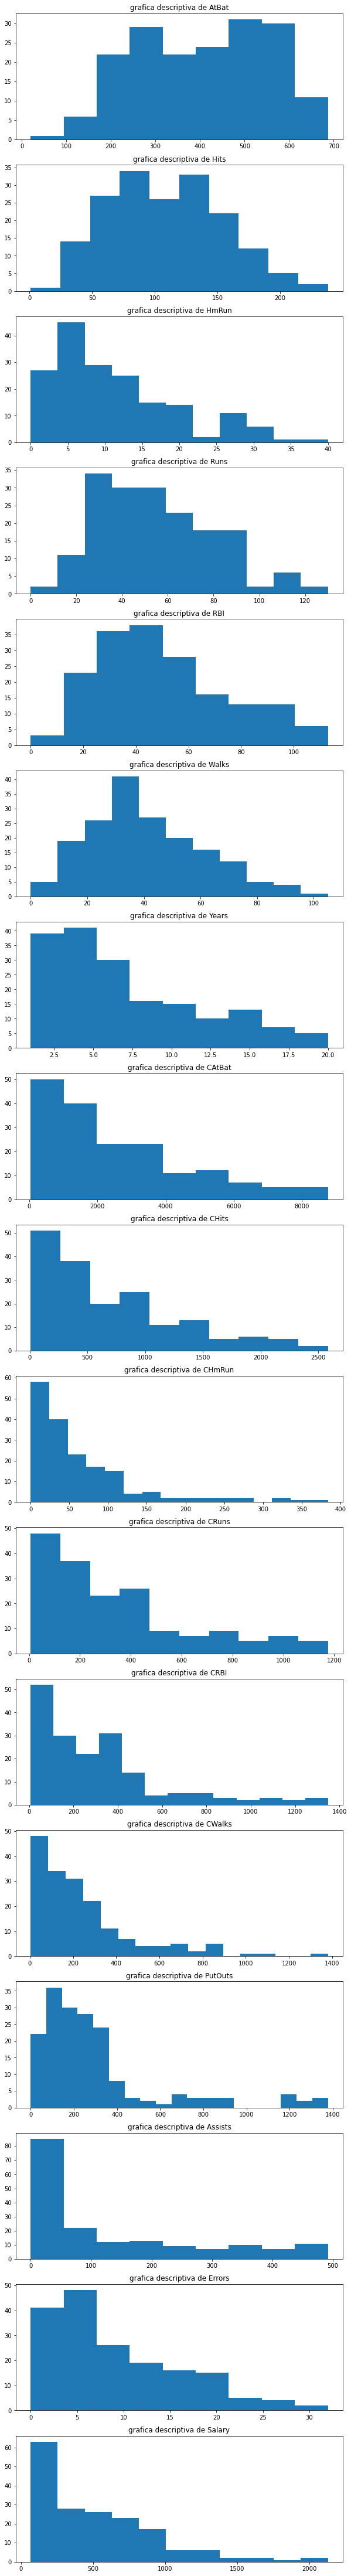

In [31]:
desc_df = pd.concat([XTrain,yTrain],axis=1)

fig ,axes = plt.subplots(nrows=len(desc_df.columns),ncols=1, figsize=(10, 80))

axs = axes.flatten()

for i, c in enumerate(desc_df):
    
    axs[i].hist(desc_df[c], bins='auto')
    axs[i].set_title("grafica descriptiva de {}".format(c))

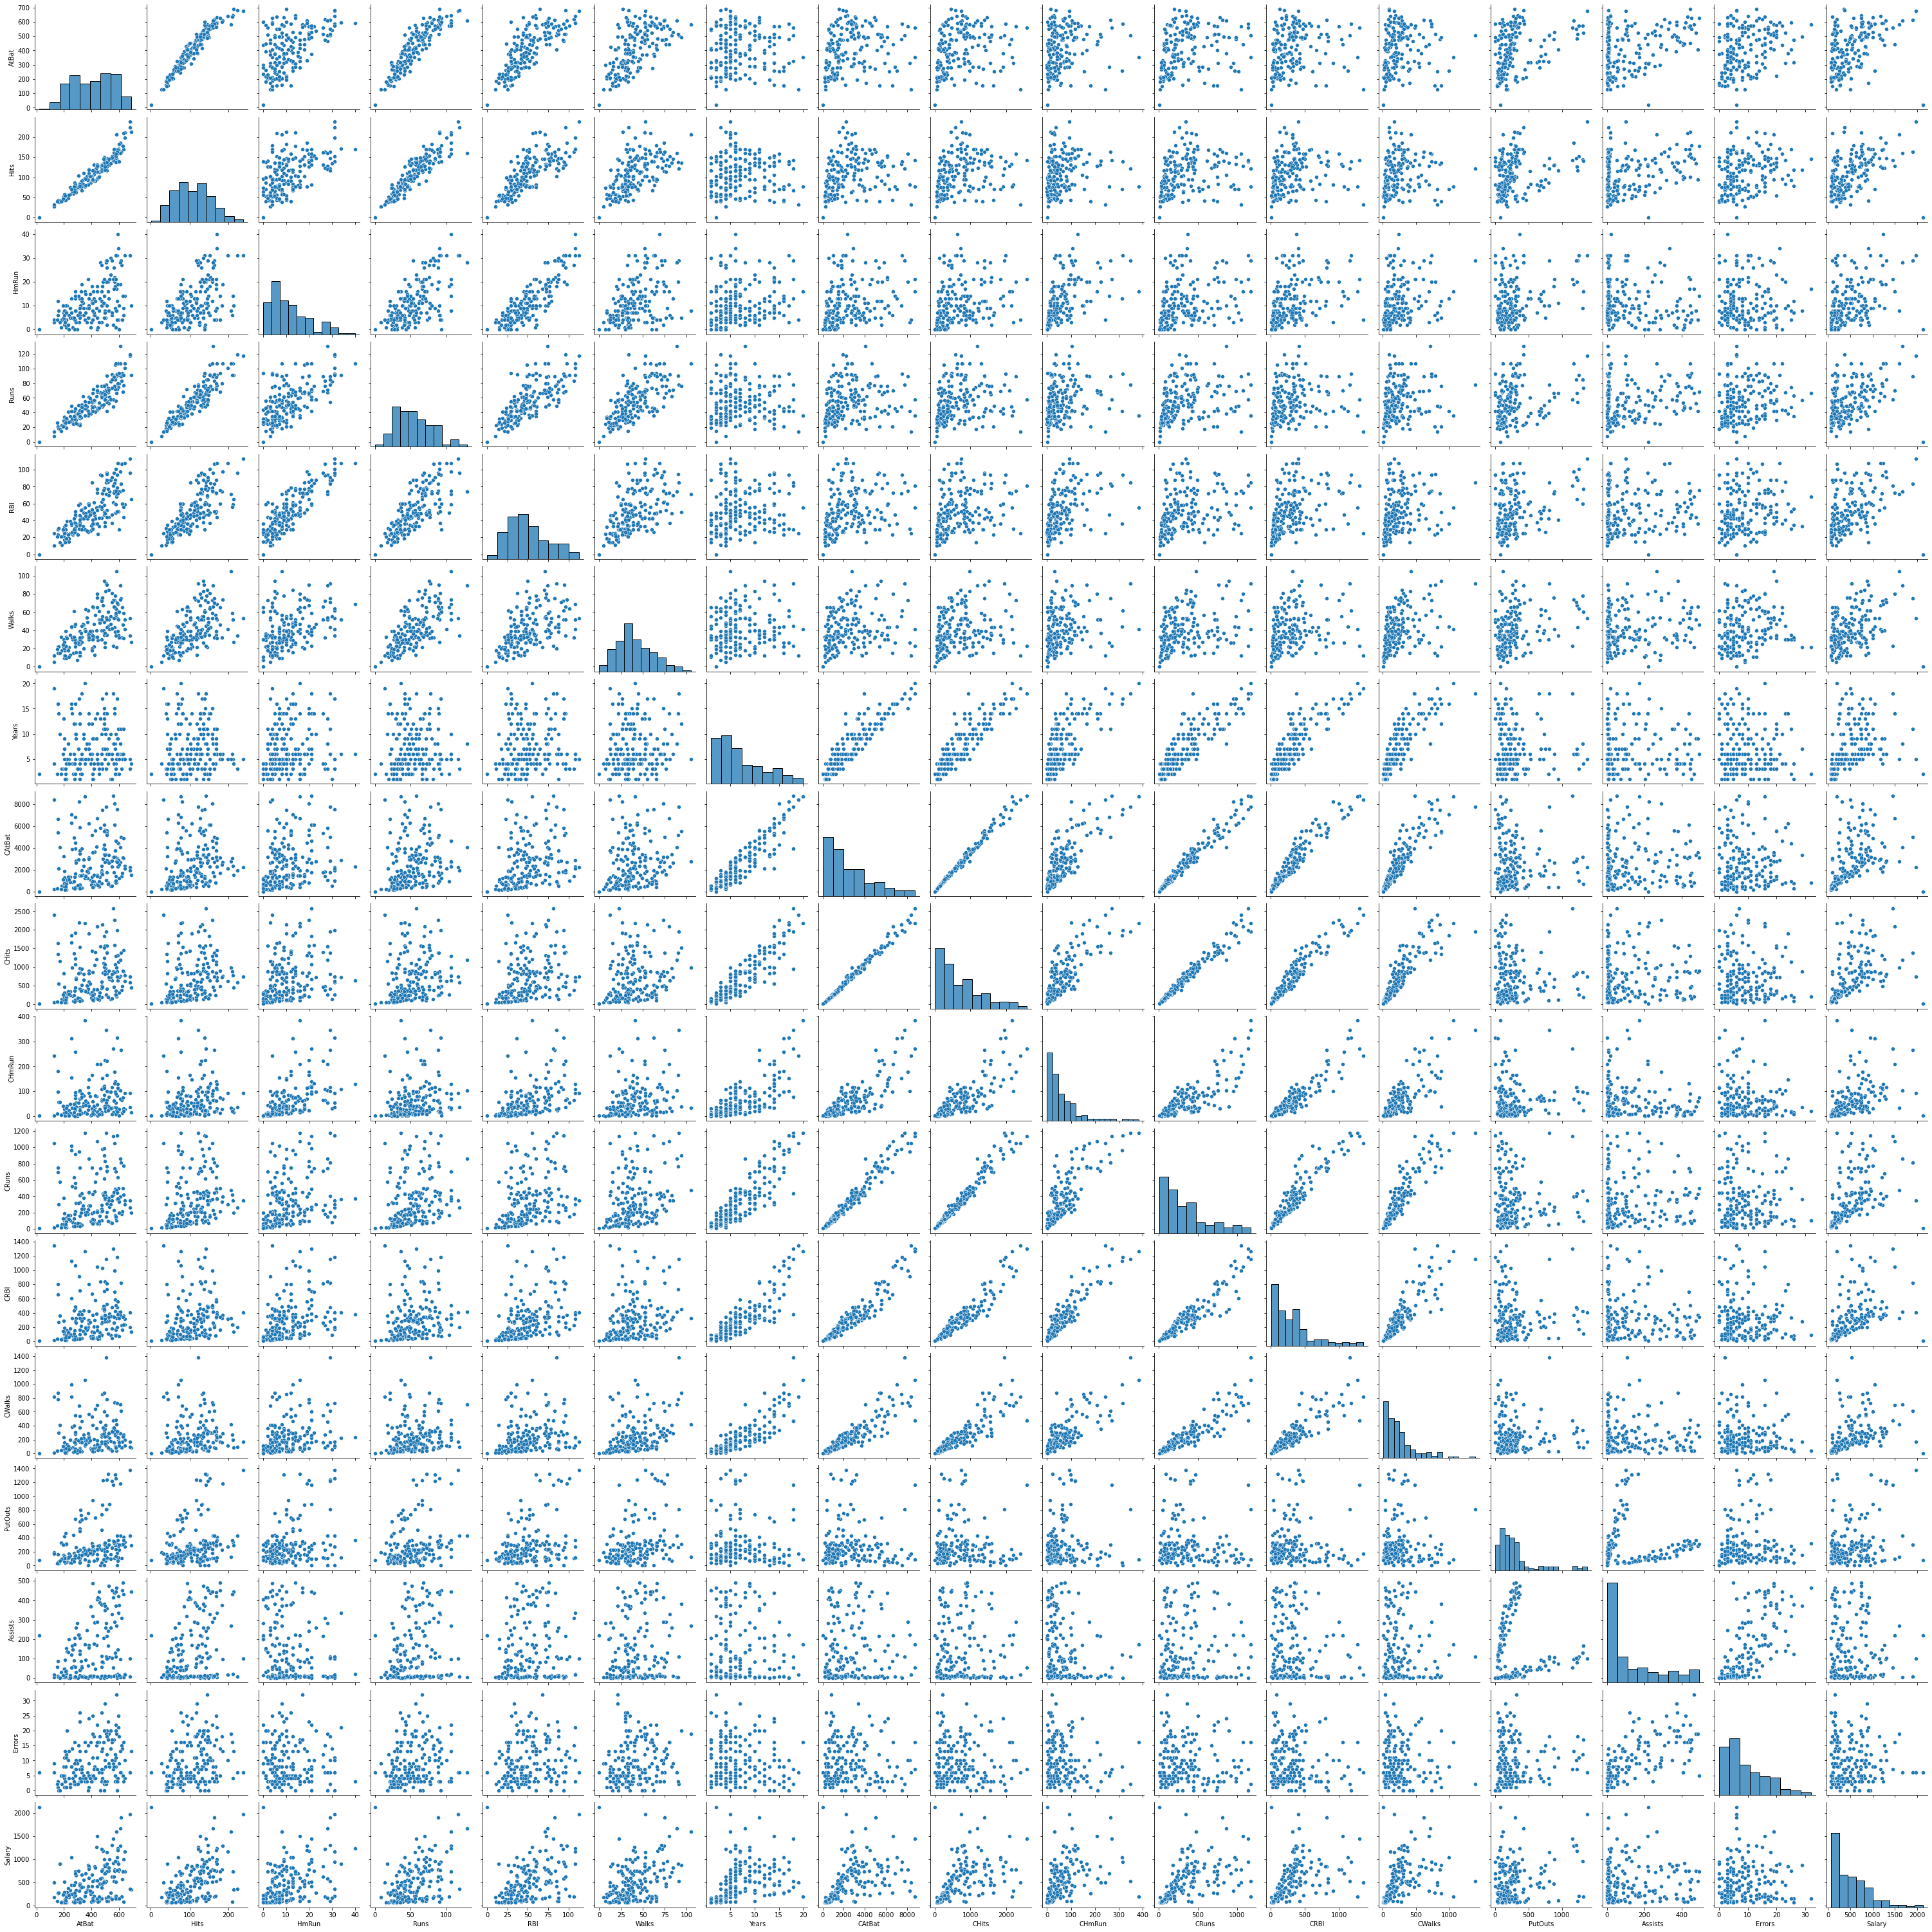

In [32]:
sns.pairplot(desc_df, kind="scatter")

<AxesSubplot:>

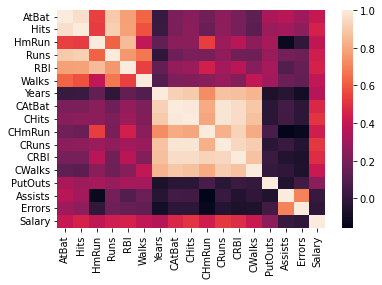

In [33]:
sns.heatmap(desc_df.corr())
#del(desc_df)

(Utilicen este espacio para describir su procedimiento y escribir su análisis y conclusiones sobre el punto 1)

#### Correlaciones
Hay alta correlacion entre ciertas variables que se evidencian en el scatter plot y en el heat map, al analizar cuales son las variables correlacionadas se encuentra que el alto valor tiene sentido lógico.

AtBat - Hits : es de esperar que entre mas veces se batee mas hits habrá

Years - C(variables) : la variable Years tiene alta correlacion con las variables que empiezan con la letra **C** ya que esta indica que es el valor a lo largo de la carrera por lo tanto entre mas longeva es la carrera es de esperar que estos valores tambien aumenten

hay variables que son altamente relacionadas entre si ya que son consecuencia de la otra, Ej CHmRun numero de Homeruns hechas en la carrera, si se hacen home runs es por que se hizo un hit, si se hizo un hit es por que habia un turno en el bat.

#### Distribuciones
Las distirbuciones hay unas que tienen un comportamiento similar a la distribucion normal, sin embargo hay varias que tienen un "skew" que evidencia que es menos comun tener valores muy altos para esta variable, mientras que la mayoria se encuentran en valores mas bajos Ej. Salary, CHmRun, pocos jugadores tienen muy altos (super estrellas) y asi mismo pocos jugadores tienen varios home runs en sus carreras


**AtBat :** Number of times at bat in 1986

**Hits :** Number of hits in 1986

**HmRun :** Number of home runs in 1986

**Runs :** Number of runs in 1986

**RBI :** Number of runs batted in in 1986

**Walks :** Number of walks in 1986

**Years :** Number of years in the major leagues

**CAtBat :** Number of times at bat during his career

**CHits :** Number of hits during his career

**CHmRun :** Number of home runs during his career

**CRuns :** Number of runs during his career

**CRBI :** Number of runs batted in during his career

**CWalks :** Number of walks during his career

**PutOuts :** Number of put outs in 1986

**Assists :** Number of assists in 1986

**Errors :** Number of errors in 1986

**Salary :** 1987 annual salary on opening day in thousands of dollars

In [34]:
scaler = StandardScaler(with_mean=True, with_std=True)
scaler.fit(XTrain)
XEscaladoTrain = scaler.transform(XTrain)

In [37]:
pd.DataFrame(XEscaladoTrain).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
count,1.760000e+02,1.760000e+02,1.760000e+02,1.760000e+02,1.760000e+02,1.760000e+02,1.760000e+02,1.760000e+02,1.760000e+02,1.760000e+02,1.760000e+02,1.760000e+02,1.760000e+02,1.760000e+02,1.760000e+02,1.760000e+02
mean,-1.312082e-16,4.794145e-17,-9.083643e-17,1.135455e-16,-1.766264e-17,-1.349930e-16,-2.523234e-18,-1.034526e-16,9.966775e-17,-5.677277e-18,-3.784851e-17,-4.415660e-17,2.397072e-17,1.267925e-16,-3.911013e-17,2.176289e-17
std,1.002853e+00,1.002853e+00,1.002853e+00,1.002853e+00,1.002853e+00,1.002853e+00,1.002853e+00,1.002853e+00,1.002853e+00,1.002853e+00,1.002853e+00,1.002853e+00,1.002853e+00,1.002853e+00,1.002853e+00,1.002853e+00
min,-2.652859e+00,-2.370624e+00,-1.330554e+00,-2.188928e+00,-2.086171e+00,-1.982751e+00,-1.349857e+00,-1.220369e+00,-1.189475e+00,-8.973560e-01,-1.161188e+00,-1.058474e+00,-1.030309e+00,-1.011387e+00,-8.742531e-01,-1.343357e+00
25%,-8.481568e-01,-7.675042e-01,-7.456949e-01,-7.936678e-01,-8.134272e-01,-7.262672e-01,-6.977760e-01,-7.893353e-01,-8.074508e-01,-6.756563e-01,-7.877091e-01,-7.597976e-01,-7.145975e-01,-6.362653e-01,-8.152078e-01,-7.620891e-01
50%,2.674614e-02,-7.887890e-02,-2.778079e-01,-1.558343e-01,-1.565270e-01,-1.946780e-01,-2.630554e-01,-3.196380e-01,-3.173792e-01,-3.413472e-01,-3.338936e-01,-2.046211e-01,-3.165270e-01,-2.696888e-01,-4.828674e-01,-3.261378e-01
75%,8.038658e-01,7.144174e-01,5.409943e-01,6.514237e-01,7.980311e-01,5.906241e-01,6.063859e-01,5.136691e-01,4.728238e-01,3.167139e-01,3.686232e-01,3.092400e-01,2.631566e-01,8.663368e-02,6.001911e-01,6.910819e-01
max,1.924085e+00,2.851910e+00,3.348316e+00,2.993468e+00,2.553186e+00,3.091509e+00,2.779989e+00,2.941035e+00,3.225028e+00,4.507894e+00,2.835124e+00,3.558529e+00,4.781310e+00,3.695147e+00,2.445777e+00,3.306790e+00


### 2. Estimación del modelo usando componentes principales (20 puntos)
Estimen un modelo predictivo usando la muestra de entrenamiento usando componentes principales y evalúen su desempeño en la muestra de test.

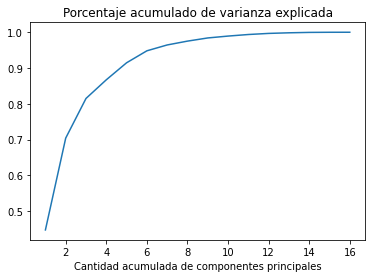

"\nnComponentesElegidas=7\n\nZTotalTrain=np.matmul(XEscaladoTrain,A)\nZTrain = ZTotalTrain[:,range(nComponentesElegidas)]\n\nregPCA = LinearRegression()\nregPCA.fit(ZTrain, yTrain)\n\nXEscaladoTest=scaler.transform(XTest)\n\nZTotalTest=np.matmul(XEscaladoTest,A)\nZTest = ZTotalTest[:,range(nComponentesElegidas)]\n\nprediccionPCA=regPCA.predict(ZTest)\nMSEPCA=np.average(np.square(prediccionPCA-yTest))\nprint('MSE regresión por componentes principales:')\nprint(MSEPCA)\n"

In [42]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 2 ####

p=len(XEscaladoTrain[1,])
pca = PCA(n_components=p).fit(XEscaladoTrain)
A=pca.components_


varianzaExplicada=pca.explained_variance_
porcentajeVarianzaExplicada=pca.explained_variance_ratio_

plt.plot(range(1,p+1),np.cumsum(porcentajeVarianzaExplicada))
plt.xlabel('Cantidad acumulada de componentes principales')
plt.title('Porcentaje acumulado de varianza explicada')
plt.show()

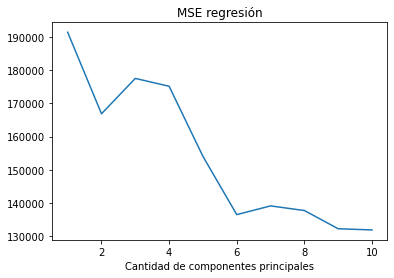

In [61]:
mse_components = []

for i in np.arange(1,11):

    ZTotalTrain=np.matmul(XEscaladoTrain,A)
    ZTrain = ZTotalTrain[:,range(i)]

    regPCA = LinearRegression()
    regPCA.fit(ZTrain, yTrain)

    XEscaladoTest=scaler.transform(XTest)

    ZTotalTest=np.matmul(XEscaladoTest,A)
    ZTest = ZTotalTest[:,range(i)]

    prediccionPCA=regPCA.predict(ZTest)
    MSEPCA=np.average(np.square(prediccionPCA-yTest))
    mse_components.append(MSEPCA)


plt.plot(np.arange(1,11),mse_components)
plt.xlabel('Cantidad de componentes principales')
plt.title('MSE regresión')
plt.show()

In [63]:
nComponentesElegidas=6

ZTotalTrain=np.matmul(XEscaladoTrain,A)
ZTrain = ZTotalTrain[:,range(nComponentesElegidas)]

regPCA = LinearRegression()
regPCA.fit(ZTrain, yTrain)

XEscaladoTest=scaler.transform(XTest)

ZTotalTest=np.matmul(XEscaladoTest,A)
ZTest = ZTotalTest[:,range(nComponentesElegidas)]

prediccionPCA=regPCA.predict(ZTest)
MSEPCA=np.average(np.square(prediccionPCA-yTest))
mse_components.append(MSEPCA)

print('MSE regresión PCA por {} componentes principales:'.format(nComponentesElegidas))
print(MSEPCA)

MSE regresión PCA por 6 componentes principales:
136530.3550586509


(Utilicen este espacio para describir su procedimiento y escribir su análisis y conclusiones sobre el punto 2)

### 3. Estimación del modelo usando PCA y el método forward (30 puntos)
Ahora construyan su propio algoritmo para hacer una regresión por componentes principales, en donde primero calculen los componentes y después realicen un proceso de selección de variables secuencial (forward) que permita encontrar el mejor modelo. Todo lo anterior en la muestra de entrenamiento.

Finalmente, evalúen el desempeño en test.

Una vez hecho este procedimiento respondan a la siguiente pregunta:

¿Es el mismo modelo del punto anterior (punto 2)? 

In [9]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 3 ####





(Utilicen este espacio para describir su procedimiento y escribir su análisis y conclusiones sobre el punto 3)

### 4. Estimación del modelo de partial least squares (20 puntos)
Predigan usando partial least squares y evalúen en la muestra de test. Concluyan sobre el poder predictivo del modelo estimado.

In [10]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 4 ####





(Utilicen este espacio para describir su procedimiento y escribir su análisis y conclusiones sobre el punto 4)

### 5. Estimación de un modelo de penalización (15 puntos)
Predigan usando un modelo de penalización y evalúen en la muestra de test. Concluyan sobre el poder predictivo del modelo estimado.

In [2]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 5 ####





(Utilicen este espacio para describir su procedimiento y escribir su análisis y conclusiones sobre el punto 5)

### 6. Elección del mejor modelo (5 puntos)
¿Cuál modelo de los estimados en este caso resulta mejor para la predicción de la variable de respuesta? Justifiquen su respuesta.

(Utilicen este espacio para escribir su análisis y conclusiones sobre el punto 6)